## Chatbot and NLP
---

### 1. Pengertian

- **Chatbot.** Program komputer yang bisa ngobrol dengan manusia, biasanya lewat teks atau suara.

- **NLP (Natural Language Processing).** Bidang AI yang fokus supaya komputer bisa ngerti bahasa manusia.

- **Bag of Words (BoW).** Cara merepresentasikan teks jadi angka berdasarkan jumlah kata.

- **Lemmatization.** Proses merubah kata ke bentuk dasarnya (contoh: running → run).

- **NN (Neural Network).** Model ML yang terinspirasi dari otak manusia, bagus buat data teks.

## 2. Manfaat

- Membuat chatbot pintar (contoh: customer service otomatis).

- Bisa sentiment analysis (positif/negatif dari teks review).

- Mempermudah search engine (Google, Tokopedia).

- Dipakai di speech recognition (Google Translate, Siri, Alexa).

## 3. Kelebihan dan Kekurangan

| Metode                             | Kelebihan                                | Kekurangan                                                          |
| ---------------------------------- | ---------------------------------------- | ------------------------------------------------------------------- |
| **Bag of Words (BoW)**             | Mudah dipahami, cepat dipakai            | Tidak paham konteks, sensitif sama kata yang nggak ada di data awal |
| **Lemmatization**                  | Bikin data lebih rapi, kata jadi seragam | Lebih lambat dari stemming                                          |
| **Neural Network**                 | Bisa nangkep pola rumit, performa bagus  | Butuh data banyak & komputasi besar                                 |
| **Chatbot sederhana (Rule-based)** | Mudah bikin, cepat jadi                  | Jawaban terbatas, nggak pintar kalau pertanyaan beda dikit          |


## 4. Visualisasi

### a. Bag of Words (BOW)

```vbnet
Kalimat: "I love Data Science"
BoW:
I        1
love     1
Data     1
Science  1
```

### b. Lemmatization
```vbnet
Input:   "Cats are running quickly"
Output:  "Cat be run quick"
```

### c. Neural Network

```css
Input (teks) -> [Embedding] -> [Hidden Layer] -> [Output: jawaban chatbot]
```

### d. Chatbot Flow

```rust
User: "Halo"
   |
   v
[Preprocessing] -> [Model NLP] -> [Pilih Respon] -> "Halo juga!"
```

## 5. Analogi

- BoW kayak menghitung kata di buku → makin sering muncul, makin penting.

- Lemmatization kayak kamus → semua kata dikembalikan ke bentuk dasar.

- Chatbot kayak resepsionis otomatis di mall → bisa jawab pertanyaan umum.

- NN kayak otak kita → belajar dari banyak pengalaman.

## 6. Dataset yang biasa digunakan

1. **Dataset Chatbot Sederhana.** seperti daftar pertanyaan dan jawaban (FAQ). contoh :

```json
{
  "greeting": ["hi", "hello", "hey"],
  "goodbye": ["bye", "see you"],
  "thanks": ["thanks", "thank you"]
}
```

2. **Dataset Sentiment Analysis.** Seperti IMDb Movie Review (positif atau negatif).

3. **Dataset SMS Spam.** Buat klasifikasi "spam" vs "ham".

---

### Making a Chatbot

Things that we use :

- BoW (Bag of Words) → representasi kata

- Lemmatization → kata dikembalikan ke bentuk dasar

- Rule-based → chatbot jawab berdasarkan intent (kategori pertanyaan)

In [44]:
# =========================
# 1. Import Library
# =========================
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import random

# Download resource
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
# =========================
# 2. Data Chatbot (FAQ)
# =========================
data = {
    "greeting": ["hello", "hi", "hey", "good morning", "good evening"],
    "goodbye": ["bye", "see you", "goodbye", "take care"],
    "thanks": ["thanks", "thank you", "thx"],
    "about": ["what is your name", "who are you", "tell me about you"]
}

responses = {
    "greeting": "Hello! How can I help you today?",
    "goodbye": "Goodbye! Have a nice day 😊",
    "thanks": "You're welcome!",
    "about": "I am a simple chatbot created to help you!"
}

In [46]:
# =========================
# 3. Preprocessing Function
# =========================
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    # Tokenize (pisahin kata)
    tokens = nltk.word_tokenize(sentence.lower())
    # Lemmatize (kembalikan ke bentuk dasar)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


In [47]:
# =========================
# 4. Bag of Words Function
# =========================
def bag_of_words(sentence, all_words):
    tokens = preprocess(sentence)
    bow = [0] * len(all_words)
    for w in tokens:
        for idx, word in enumerate(all_words):
            if word == w:
                bow[idx] = 1
    return np.array(bow)

In [48]:
# =========================
# 5. Buat Vocabulary (semua kata unik)
# =========================
all_words = []
for intent in data.values():
    for pattern in intent:
        all_words.extend(preprocess(pattern))
all_words = sorted(set(all_words))  # hapus duplikat

In [49]:
# =========================
# 6. Chatbot Function
# =========================
def chatbot_response(user_input):
    tokens = preprocess(user_input)
    
    # Cek tiap intent
    for intent, patterns in data.items():
        for pattern in patterns:
            if set(tokens).intersection(preprocess(pattern)):
                return responses[intent]
    
    return "I'm not sure I understand. Can you rephrase?"

In [50]:
# =========================
# 7. Jalankan Chatbot
# =========================
print("🤖 Chatbot ready! Type 'quit' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Goodbye 👋")
        break
    print("Chatbot:", chatbot_response(user_input))

🤖 Chatbot ready! Type 'quit' to exit.
Chatbot: Hello! How can I help you today?
Chatbot: Goodbye! Have a nice day 😊
Chatbot: You're welcome!
Chatbot: Goodbye 👋


### Contoh Interaksi (Rule-Based) :

```vbnet
🤖 Chatbot ready! Type 'quit' to exit.
You: hi
Chatbot: Hello! How can I help you today?

You: what is your name?
Chatbot: I am a simple chatbot created to help you!

You: thanks
Chatbot: You're welcome!

You: bye
Chatbot: Goodbye! Have a nice day 😊
```

----

### ChatBot with Machine Learning

Things we used :

- BoW

- Lemmatization

- Machine Learning (Logistic Regression)

In [51]:
# ================================
# 1. Import Library
# ================================
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# ================================
# 2. Data Training Chatbot
# ================================
training_data = [
    ("hello", "greeting"),
    ("hi", "greeting"),
    ("hey", "greeting"),
    ("good morning", "greeting"),
    ("good evening", "greeting"),

    ("bye", "goodbye"),
    ("see you", "goodbye"),
    ("goodbye", "goodbye"),
    ("take care", "goodbye"),

    ("thanks", "thanks"),
    ("thank you", "thanks"),
    ("thx", "thanks"),

    ("what is your name", "about"),
    ("who are you", "about"),
    ("tell me about you", "about"),
]

responses = {
    "greeting": "Hello! How can I help you today?",
    "goodbye": "Goodbye! Have a nice day 😊",
    "thanks": "You're welcome!",
    "about": "I am a simple chatbot created to help you!"
}


In [53]:
# ================================
# 3. Preprocessing
# ================================
lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    tokens = nltk.word_tokenize(sentence.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

X = [lemmatize_sentence(text) for text, label in training_data]
y = [label for text, label in training_data]

In [54]:
# ================================
# 4. Bag of Words + Model
# ================================
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

model = LogisticRegression()
model.fit(X_bow, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
# ================================
# 5. Chatbot Function
# ================================
def chatbot_response(user_input):
    user_input = lemmatize_sentence(user_input)
    bow = vectorizer.transform([user_input])
    prediction = model.predict(bow)[0]
    return responses.get(prediction, "I'm not sure I understand. Can you rephrase?")

In [56]:
# ================================
# 6. Jalankan Chatbot
# ================================
print("🤖 ML Chatbot ready! Type 'quit' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Goodbye 👋")
        break
    print("Chatbot:", chatbot_response(user_input))

🤖 ML Chatbot ready! Type 'quit' to exit.
Chatbot: Hello! How can I help you today?
Chatbot: Hello! How can I help you today?
Chatbot: Hello! How can I help you today?
Chatbot: Hello! How can I help you today?
Chatbot: I am a simple chatbot created to help you!
Chatbot: Goodbye 👋


### Contoh Interaksi (ML) :

```vbnet
🤖 ML Chatbot ready! Type 'quit' to exit.
You: hi there
Chatbot: Hello! How can I help you today?

You: what can you tell me about yourself?
Chatbot: I am a simple chatbot created to help you!

You: thanksss
Chatbot: You're welcome!

You: see you later
Chatbot: Goodbye! Have a nice day 😊
```

| Aspek          | Rule-based                  | Machine Learning                          |
| -------------- | --------------------------- | ----------------------------------------- |
| Cara kerja     | Cocokin kata/manual         | Belajar pola dari data                    |
| Fleksibilitas  | Kaku (harus sesuai pattern) | Lebih fleksibel, bisa handle variasi kata |
| Perlu training | ❌ Tidak                     | ✅ Ya                                      |
| Cocok untuk    | FAQ sederhana               | Chatbot lebih dinamis                     |


---

### Chatbot with NN (Neural Network)

Things we used :

- BoW

- Lemmatization

- NN

In [ ]:
# ====================================
# 1. Import Library
# ====================================
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# ====================================
# 2. Data Training
# ====================================
training_data = [
    ("hello", "greeting"),
    ("hi", "greeting"),
    ("hey", "greeting"),
    ("good morning", "greeting"),
    ("good evening", "greeting"),

    ("bye", "goodbye"),
    ("see you", "goodbye"),
    ("goodbye", "goodbye"),
    ("take care", "goodbye"),

    ("thanks", "thanks"),
    ("thank you", "thanks"),
    ("thx", "thanks"),

    ("what is your name", "about"),
    ("who are you", "about"),
    ("tell me about you", "about"),
]

responses = {
    "greeting": "Hello! How can I help you today?",
    "goodbye": "Goodbye! Have a nice day 😊",
    "thanks": "You're welcome!",
    "about": "I am a simple chatbot powered by a neural network!"
}

In [ ]:
# ====================================
# 3. Preprocessing
# ====================================
lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    tokens = nltk.word_tokenize(sentence.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

X = [lemmatize_sentence(text) for text, label in training_data]
y = [label for text, label in training_data]

# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X).toarray()

# Label Encoding
labels = list(set(y))
label2idx = {label: idx for idx, label in enumerate(labels)}
idx2label = {idx: label for label, idx in label2idx.items()}
y_encoded = np.array([label2idx[label] for label in y])
y_onehot = to_categorical(y_encoded)

In [ ]:
# ====================================
# 4. Build Neural Network
# ====================================
model = Sequential()
model.add(Dense(16, input_dim=X_bow.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dense(len(labels), activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# ====================================
# 5. Training
# ====================================
model.fit(X_bow, y_onehot, epochs=200, verbose=0)

In [ ]:
# ====================================
# 6. Chatbot Function
# ====================================
def chatbot_response(user_input):
    user_input = lemmatize_sentence(user_input)
    bow = vectorizer.transform([user_input]).toarray()
    prediction = model.predict(bow, verbose=0)
    label_idx = np.argmax(prediction)
    label = idx2label[label_idx]
    return responses.get(label, "I'm not sure I understand. Can you rephrase?")

In [ ]:
# ====================================
# 7. Run Chatbot
# ====================================
print("🤖 Neural Network Chatbot ready! Type 'quit' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Goodbye 👋")
        break
    print("Chatbot:", chatbot_response(user_input))

#### Contoh Interaksi : 

```vbnet
🤖 Neural Network Chatbot ready! Type 'quit' to exit.

You: hi there
Chatbot: Hello! How can I help you today?

You: what’s your name?
Chatbot: I am a simple chatbot powered by a neural network!

You: thx
Chatbot: You're welcome!

You: bye friend
Chatbot: Goodbye! Have a nice day 😊
```


---

### Dataset you can use for Chatbot or NLP Project

#### 1. Cornell Movie Dialogs Corpus

- Isi       : kumpulan percakapan dari ribuan film → bisa bikin chatbot mirip percakapan manusia.

- Sumber    : https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html

- Kelebihan :

    - Banyak variasi dialog (natural).

    - Bisa dipakai untuk seq2seq atau deep learning chatbot.

- Kekurangan    :

- Agak besar dan noisy → perlu preprocessing.

#### 2. Twitter US Airline Sentiment Dataset (Kaggle)

- Isi   : tweet customer tentang maskapai penerbangan (positif, netral, negatif).

- Link  : https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

- Project Idea  :

    - Chatbot bisa analisis emosi user ("Kamu lagi marah, ya?").

    - Bisa diintegrasi dengan FAQ maskapai.

#### 3. Amazon / Yelp Reviews Dataset

- Isi   : review produk & restoran (positif/negatif, teks panjang).

- Link  : https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset

- Project Idea  :

    - Chatbot bisa kasih respon berdasarkan “sentimen” customer.

    - Misalnya: kalau review negatif → chatbot jawab minta maaf.

#### 4. FAQ Dataset / Customer Support

- Ada dataset chatbot customer support di Kaggle.

- Customer Support on Twitter : https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter

- Isi   : percakapan customer ↔ brand.

- Project Idea  : chatbot untuk helpdesk.

#### 5. News Headlines / Quora Questions

- Quora Question Pairs
 → cocok buat chatbot QnA (deteksi pertanyaan mirip) : 
 https://www.kaggle.com/c/quora-question-pairs
 

- News Headlines Dataset
 → chatbot bisa jawab berdasarkan kategori berita : 
 https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

---

## Roadmap Project Chatbot ( Beginner to Advance )

### 1. Beginner (Rules-Based + Bag of Words)

**Tujuan -> memahami konsep dasar chatbot.**

- Dataset: buatan sendiri (manual) → contoh greeting, thanks, bye.

- Tools: NLTK / scikit-learn.

- Teknik:

    - Preprocessing (tokenizing, lower, stopwords, lemmatization).

    - Representasi teks → Bag of Words (CountVectorizer).

    - Rule-based response (if–else / keyword matching).

Output : Simple Chatbot

```makefile
User: hi
Bot: Halo! Ada yang bisa saya bantu?
```

### 2. Intermediate (FAQ / Sentiment-based Chatbot)

**Tujuan: mengenalkan dataset real dari Kaggle.**

🔹 Pilihan Dataset:

- Twitter US Airline Sentiment : https://www.kaggle.com/crowdflower/twitter-airline-sentiment

- Customer Support on Twitter : https://www.kaggle.com/thoughtvector/customer-support-on-twitter

🔹 Teknik:

- Representasi teks → TF-IDF.

- Model ML → Logistic Regression, Naive Bayes, SVM.

- Chatbot bisa deteksi emosi/sentimen atau jawab FAQ sederhana.

Output :

```makefile
User: Layanan kalian buruk sekali, delay 5 jam!
Bot: Saya mengerti perasaan Anda. Mohon maaf atas ketidaknyamanan ini.
```

### 3. Advanced (Conversation Bot dengan Cornell Movie Corpus)

**Tujuan: membuat chatbot percakapan yang lebih natural.**

🔹 Dataset: Cornell Movie Dialogs Corpus : https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html

🔹 Teknik:

- Preprocessing besar (cleaning dialog).

- Word Embedding (Word2Vec / GloVe) atau TF-IDF.

- Algoritma :

    - Retrieval-based chatbot (TF-IDF + cosine similarity).

    - Generative chatbot (seq2seq LSTM/Transformer → kalau mau deep learning).

Output : 

```makefile
User: What are you doing?
Bot: Just hanging out. You?
```

### 4. (Optional - Expert Level 🚀)

- Pakai transformer models (BERT, GPT-2) dengan dataset dialog.

- Tools: transformers (Hugging Face).

- Bisa bikin chatbot yang mirip ChatGPT kecil-kecilan.

### Visualisasi Roadmap

```css
[ Beginner ] ---> [ Intermediate ] ---> [ Advanced ] ---> [ Expert ]
   Rule-based         Sentiment/FAQ        Movie Dialogs     Transformers
   + BoW              + TF-IDF + ML       + Retrieval/Gen   + Pretrained LLM
   (Dataset kecil)    (Dataset Kaggle)    (Dataset besar)   (HuggingFace)
```

---

## Project Twitter Airline Sentiment 

### Persiapan Installasi

```bash
pip install pandas numpy scikit-learn matplotlib seaborn nltk joblib
# jika ingin pakai HuggingFace datasets (alternatif download):
pip install datasets
# kalau mau LSTM/keras:
pip install tensorflow
```

### Making the Project

In [ ]:
# ===== 0. Imports & downloads =====
import pandas as pd, numpy as np
import re, joblib
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
# ===== 1. Load Dataset =====
df = pd.read_csv('Tweets.csv')
df = df.rename(columns={c:c.strip() for c in df.columns})
print("Shape : ", df.shape)
print(df.head())

In [ ]:
# 2. EDA
print(df['airline_sentiment'].value_counts())
print(df[['airline','airline_sentiment']].groupby('airline').size().sort_values(ascending=False))

In [ ]:
# Plot distribusi sentiment
sns.countplot(x="airline_sentiment", data=df)
plt.title("Distribusi Sentimen")
plt.show()

In [ ]:
# Top negativereason (untuk negative tweets)
if 'negativereason' in df.columns:
    print(df[df['airline_sentiment']=='negative']['negativereason'].value_counts().head(10))

In [ ]:
# ===== 3. Preprocessing functions =====
STOP = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    # lower
    text = text.lower()
    # remove url
    text = re.sub(r'http\S+|www.\S+', '', text)
    # remove mentions and hashtags (or keep hashtags if you want)
    text = re.sub(r'@\w+','', text)
    text = re.sub(r'#','', text)
    # remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # tokenize & remove stopwords & lemmatize
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in STOP and len(t)>1]
    return " ".join(tokens)

# apply (bisa memakan waktu; untuk kelas, kamu bisa apply pada sample kecil)
df['text_clean'] = df['text'].apply(clean_text)
df[['text','text_clean']].head()

In [ ]:
# ===== 4. Prepare X, y =====
# Map labels (keep strings or map to numbers)
y = df['airline_sentiment']   # values: negative, neutral, positive
X = df['text_clean']

# Jika mau jadi biner (negative vs others):
# y = df['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

In [ ]:
# ===== 5. Train test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42, stratify=y)

In [ ]:
# ===== 6. Build TF-IDF + classifier pipelines =====
pipelines = {
    'MultinomialNB': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000)),
        ('clf', MultinomialNB())
    ]),
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000)),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'RandomForest': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
        ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
    ])
}

In [ ]:
# Train & evaluate each
results = {}
for name, pipe in pipelines.items():
    print("Training", name)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(name, "accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred, labels=['negative','neutral','positive'])
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['neg','neu','pos'], yticklabels=['neg','neu','pos'])
    plt.title(f"Confusion matrix - {name}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()
    results[name] = {'model': pipe, 'y_pred': y_pred}

### Hasil Evaluasi Model

| Model                  | Accuracy   | Precision (macro) | Recall (macro) | F1-score (macro) | Catatan                                                             |
| ---------------------- | ---------- | ----------------- | -------------- | ---------------- | ------------------------------------------------------------------- |
| **MultinomialNB**      | 0.6909     | 0.7662            | 0.4544         | 0.4684           | Recall & F1 rendah, banyak miss di neutral/positive                 |
| **LogisticRegression** | **0.7756** | 0.7554            | 0.6452         | **0.6818**       | ✅ Akurasi tertinggi, balance precision/recall, paling bagus overall |
| **RandomForest**       | 0.7568     | 0.7176            | 0.6416         | 0.6697           | Bagus juga, tapi masih di bawah LogisticRegression                  |


In [ ]:
# ===== 7. Save best model (contoh simpan logistic) =====
best = pipelines['LogisticRegression']   # pilih berdasarkan evaluasi
joblib.dump(best, "airline_sentiment_logreg.joblib")
print("Saved model to airline_sentiment_logreg.joblib")

### Implementasi pada data baru

In [ ]:
import joblib

# Load model
model = joblib.load("airline_sentiment_logreg.joblib")

In [ ]:
# Contoh tweet baru
new_tweets = [
    "The flight was delayed for 4 hours, terrible service!",
    "Amazing experience, friendly staff and smooth flight.",
    "It was fine, nothing special but not bad either."
]

# Prediksi langsung
predictions = model.predict(new_tweets)

for tweet, label in zip(new_tweets, predictions):
    print(f"{tweet} -> {label}")

In [ ]:
# Nampilin Probabilitas
proba = model.predict_proba(new_tweets)

for tweet, label, prob in zip(new_tweets, predictions, proba):
    print(f"{tweet} -> {label} | Probabilities: {prob}")


In [ ]:
# Nyoba langsung masukin komentar tweet
while True:
    text = input("Masukkan tweet (atau 'exit' untuk keluar): ")
    if text.lower() == "exit":
        break
    pred = model.predict([text])[0]
    print("Prediksi Sentimen:", pred)


### Demo menggunakan Streamlit

#### 1. Install Streamlit

```python
pip install streamlit
```

#### 2. Membuat file baru Python `App.py`

```python
import streamlit as st
import joblib

# Load model
model = joblib.load("airline_sentiment_logreg.joblib")

# Judul aplikasi
st.title("✈️ Airline Tweet Sentiment Classifier")
st.write("Masukkan teks tweet untuk memprediksi sentimen (negative, neutral, positive).")

# Input teks dari user
user_input = st.text_area("Masukkan Tweet", "")

if st.button("Prediksi"):
    if user_input.strip() != "":
        prediction = model.predict([user_input])[0]
        probabilities = model.predict_proba([user_input])[0]

        st.subheader("Hasil Prediksi:")
        st.write(f"**Sentimen:** {prediction}")

        st.subheader("Probabilitas:")
        st.write({
            "negative": round(probabilities[0], 3),
            "neutral": round(probabilities[1], 3),
            "positive": round(probabilities[2], 3),
        })
    else:
        st.warning("Harap masukkan tweet terlebih dahulu.")
```

#### 3. Menjalankan Aplikasi

```bash
streamlit run app.py
```

### Hasil Demo

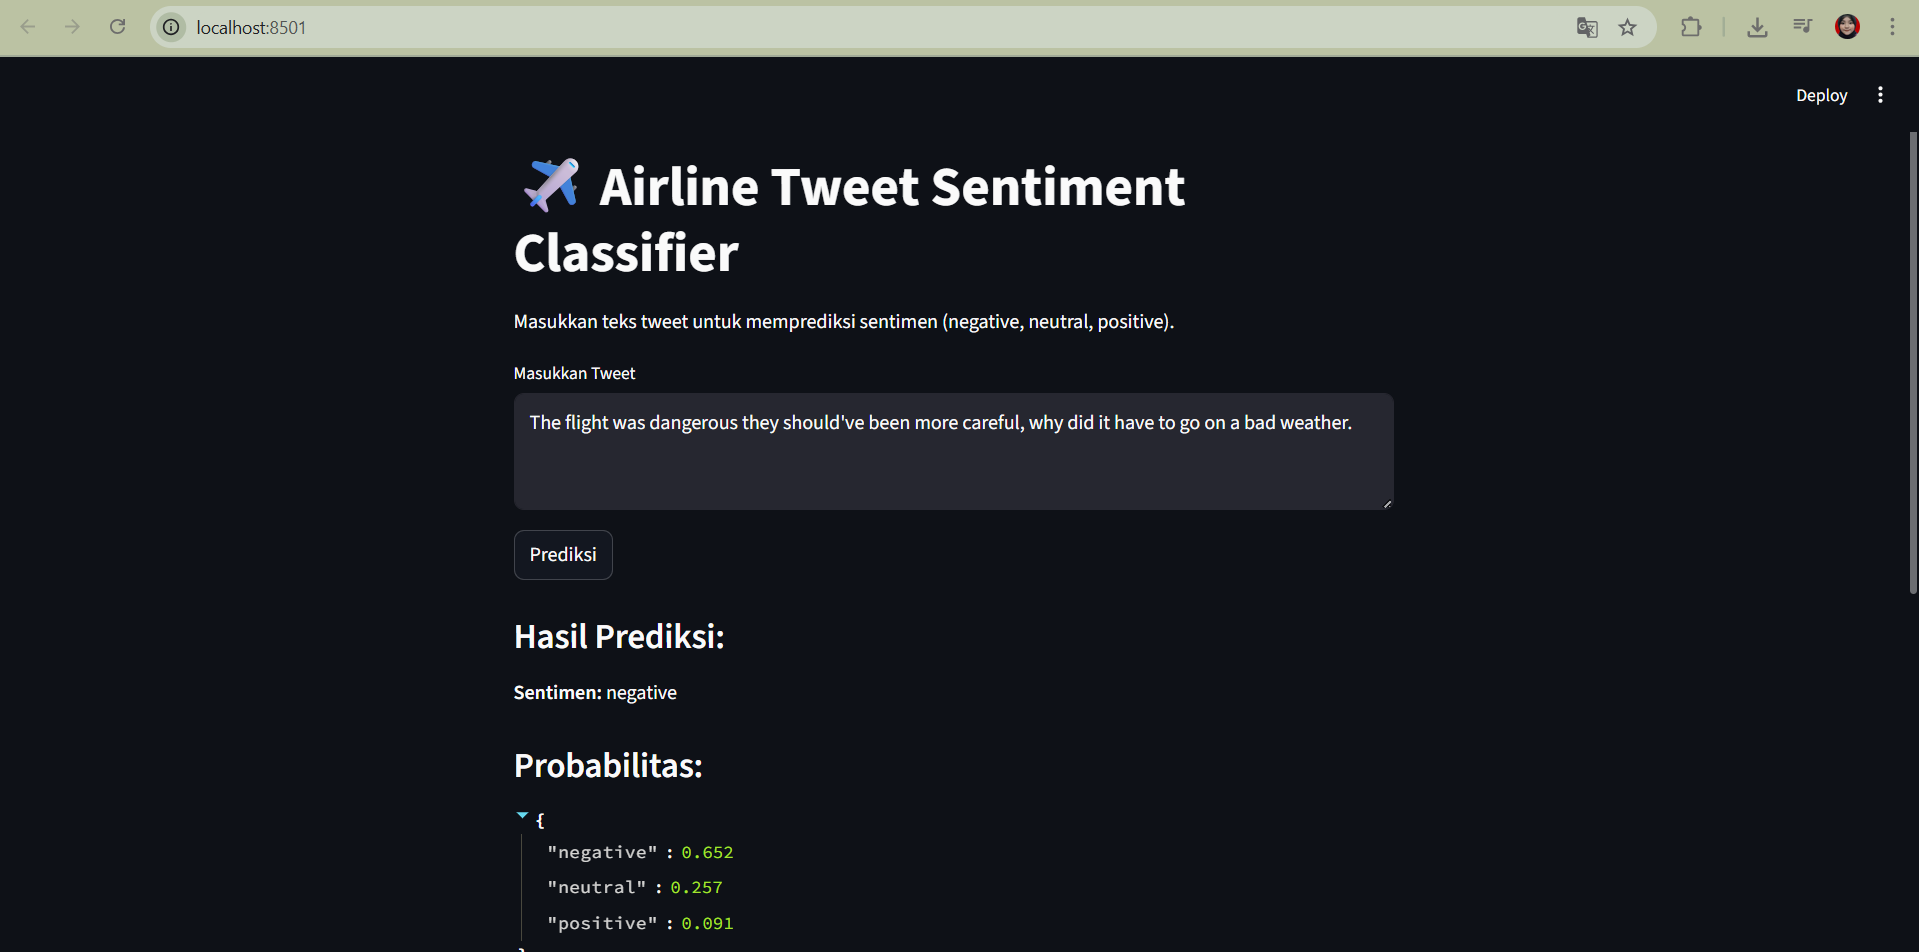

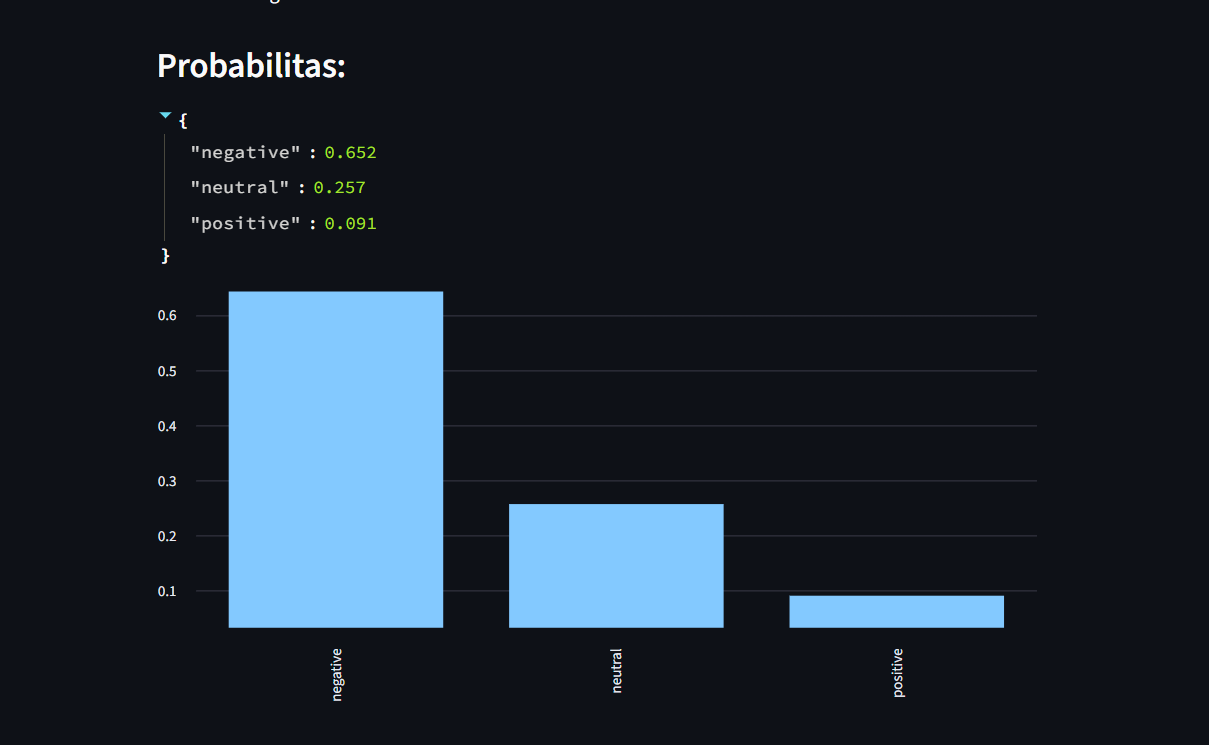